In [2]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

In [3]:
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import exposure
from skimage import img_as_float, img_as_ubyte, io

In [4]:
#from rasterio import features
with rasterio.open('vari/vari.tif') as dataset:
    vari = dataset.read(1).astype(np.float32)
    meta = dataset.meta

(array([2.9980e+04, 3.1107e+04, 3.2276e+04, 3.3073e+04, 3.4919e+04,
        3.5399e+04, 3.4460e+04, 3.4158e+04, 3.3498e+04, 3.3108e+04,
        3.3404e+04, 3.2398e+04, 3.1659e+04, 3.0442e+04, 2.9229e+04,
        2.8063e+04, 2.6626e+04, 2.5214e+04, 2.4175e+04, 2.2472e+04,
        2.1607e+04, 2.0310e+04, 1.9050e+04, 1.8182e+04, 1.7037e+04,
        1.7149e+04, 1.3858e+04, 1.3686e+04, 1.2900e+04, 1.1532e+04,
        1.0417e+04, 9.3940e+03, 8.3990e+03, 7.2960e+03, 6.4520e+03,
        5.2900e+03, 4.6880e+03, 3.8550e+03, 3.2770e+03, 2.5920e+03,
        2.1610e+03, 1.7530e+03, 1.3650e+03, 1.2140e+03, 8.9900e+02,
        7.5100e+02, 6.1200e+02, 5.0500e+02, 3.2400e+02, 3.4400e+02,
        2.9800e+02, 2.7100e+02, 2.2300e+02, 2.5500e+02, 2.0700e+02,
        1.8400e+02, 1.6000e+02, 1.3400e+02, 1.4700e+02, 1.0500e+02,
        1.0600e+02, 9.7000e+01, 1.2100e+02, 3.9000e+01, 7.4000e+01,
        6.6000e+01, 7.0000e+01, 4.9000e+01, 5.5000e+01, 4.5000e+01,
        3.9000e+01, 2.9000e+01, 4.1000e+01, 3.40

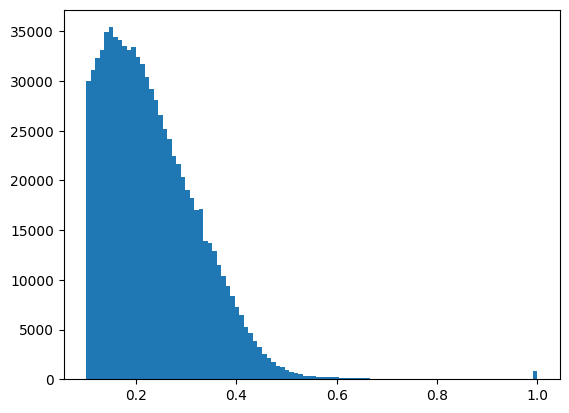

In [7]:
plt.hist(vari.flatten(), bins=100, range=(0.1,1))

In [41]:
dataset.shape

(2139, 2557)

In [19]:
print(np.max(vari))

1.0


(array([1.6790000e+03, 9.5000000e+01, 2.8100000e+02, 3.7700000e+02,
        3.9100000e+02, 5.7700000e+02, 4.0400000e+02, 5.0800000e+02,
        6.5000000e+02, 2.8100000e+02, 1.0800000e+03, 6.6500000e+02,
        9.5800000e+02, 8.8700000e+02, 8.3700000e+02, 1.2060000e+03,
        1.6630000e+03, 1.2800000e+03, 1.7420000e+03, 1.6070000e+03,
        2.6290000e+03, 2.8310000e+03, 3.5200000e+03, 4.1580000e+03,
        3.5610000e+03, 9.8260000e+03, 9.8500000e+03, 1.3108000e+04,
        1.8932000e+04, 2.4135000e+04, 4.1990000e+04, 5.6846000e+04,
        8.7678000e+04, 1.2763000e+05, 1.8355600e+05, 2.7979600e+05,
        3.9534700e+05, 5.4561300e+05, 7.4414300e+05, 9.1069200e+05,
        1.2370880e+06, 1.4125130e+06, 1.5946270e+06, 1.6414510e+06,
        1.5586540e+06, 1.4669130e+06, 1.2902970e+06, 1.1863510e+06,
        1.1918770e+06, 9.3870800e+05, 8.8670656e+07, 2.1759070e+06,
        3.7838920e+06, 6.5594440e+06, 7.6294740e+06, 8.1282100e+06,
        7.9583970e+06, 6.8178280e+06, 5.2249710e

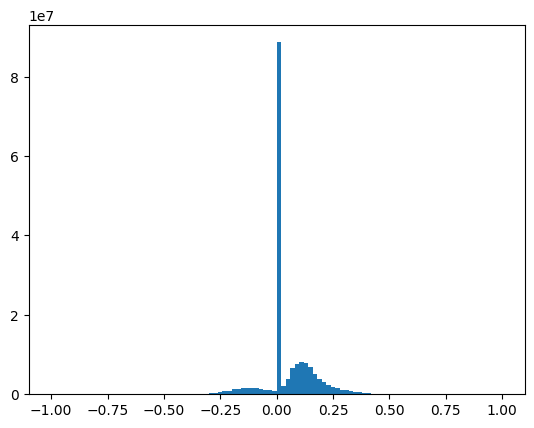

In [13]:
plt.hist(vari.flatten(), bins=100)

In [42]:
sigma_est = np.mean(estimate_sigma(vari, channel_axis=None))
sigma_est

0.0030711046057331193

In [46]:
denoise = denoise_nl_means(vari, h=3 * sigma_est, fast_mode=True, patch_size=3, patch_distance=6)

In [ ]:
plt.hist(denoise.flatten(), bins=100, range=(-1,1))

In [ ]:
!pip install PyWavelets

In [44]:
eq = exposure.equalize_adapthist(denoise)

Text(0.5, 1.0, 'eq')

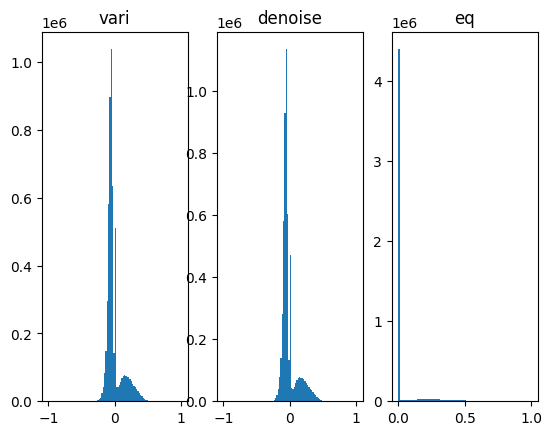

In [52]:
fig, (a1,a2,a3) = plt.subplots(1,3)
a1.hist(vari.flatten(), bins=100)
a1.set_title('vari')
a2.hist(denoise.flatten(), bins=100)
a2.set_title('denoise')
a3.hist(eq.flatten(), bins=100)
a3.set_title('eq')

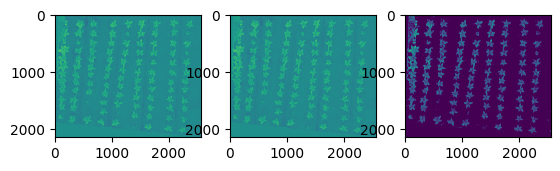

In [45]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
ax1.imshow(vari)
ax2.imshow(denoise)
ax3.imshow(eq)

In [35]:
from rasterio.transform import from_origin

In [36]:
# Specify the path to save the output TIFF file
processed_img = 'cleaned/processed_2ha.tif'

# Assuming 'meta' contains the metadata obtained from the original raster file
# Adjust the metadata as necessary for your output
meta['dtype'] = 'float32'  # Define the data type of the output TIFF
transform = from_origin(meta['transform'][2], meta['transform'][5], meta['transform'][0], meta['transform'][3])

with rasterio.open(processed_img, 'w', **meta) as dst:
    dst.write(eq, 1)  # Writing the cleaned array into the TIFF file

In [ ]:
plt.hist(eq.flatten(), bins=100, range=(-1,1))

In [ ]:
plt.imshow(denoise)

In [ ]:
plt.imshow(eq)

In [ ]:
np.min(eq)

In [ ]:
markers = np.zeros(dataset.shape, dtype=np.float32)

In [ ]:
nitrogen20 = (eq > 0.0) & (eq < 0.1)
nitrogen40 = (eq > 0.1) & (eq < 0.2)
nitrogen60 = (eq > 0.2) & (eq < 0.3)
nitrogen80 = (eq > 0.3) & (eq < 0.4)
# seg3 = (denoise >=0.2) & (denoise <0.3)
# seg4 = (denoise >=0.3) & (denoise <0.40)
# seg5 = (denoise >=0.4) & (denoise <0.90)

In [ ]:
all_segment = np.zeros((dataset.shape[0], dataset.shape[1], 1))

In [ ]:
plt.hist(denoise.flat, bins=100)

In [ ]:
markers[nitrogen20] = (10)
markers[nitrogen40] = (20)
markers[nitrogen60] = (30)
markers[nitrogen80] = (40)
# all_segment[seg3] = (40)
# all_segment[seg4] = (2)
# all_segment[seg5] = (1)
plt.imshow(markers)

In [ ]:
plt.imshow(vari)

In [ ]:
from scipy import ndimage as nd
from rasterio.transform import from_origin

In [ ]:
x=5

In [ ]:
seg1_open = nd.binary_opening(nitrogen20, np.ones((x,x)))
seg1_close = nd.binary_closing(seg1_open, np.ones((x,x)))

seg2_open = nd.binary_opening(nitrogen40, np.ones((x,x)))
seg2_close = nd.binary_closing(seg2_open, np.ones((x,x)))
                                                  
seg3_open = nd.binary_opening(nitrogen60, np.ones((x,x)))
seg3_close = nd.binary_closing(seg3_open, np.ones((x,x)))

seg4_open = nd.binary_opening(nitrogen80, np.ones((x,x)))
seg4_close = nd.binary_closing(seg4_open, np.ones((x,x)))

# seg5_open = nd.binary_opening(nitrogen20, np.ones((x,x)))
# seg5_close = nd.binary_closing(seg5_open, np.ones((x,x)))

In [ ]:
cleaned = np.zeros((dataset.shape[0], dataset.shape[1]), dtype=np.float32)

In [ ]:
cleaned[seg1_close] = (0)
cleaned[seg2_close] = (23)
cleaned[seg3_close] = (40)
cleaned[seg4_close] = (2)
#cleaned[seg5_close] = (1)
plt.imshow(cleaned)

In [ ]:
cleaned.shape

In [ ]:
# Specify the path to save the output TIFF file
output_file_cleaned = 'cleaned/clean_2ha.tif'

# Assuming 'meta' contains the metadata obtained from the original raster file
# Adjust the metadata as necessary for your output
meta['dtype'] = 'float32'  # Define the data type of the output TIFF
transform = from_origin(meta['transform'][2], meta['transform'][5], meta['transform'][0], meta['transform'][3])

with rasterio.open(output_file_cleaned, 'w', **meta) as dst:
    dst.write(cleaned, 1)  # Writing the cleaned array into the TIFF file

In [ ]:
from skimage.segmentation import random_walker

In [ ]:
labels = random_walker(eq, markers, beta=10, mode='bf')

In [ ]:
plt.imshow(labels)

In [ ]:
# Specify the path to save the output TIFF file
labels_out = 'labels.tif'

# Assuming 'meta' contains the metadata obtained from the original raster file
# Adjust the metadata as necessary for your output
meta['dtype'] = 'float32'  # Define the data type of the output TIFF
transform = from_origin(meta['transform'][2], meta['transform'][5], meta['transform'][0], meta['transform'][3])

with rasterio.open(labels_out, 'w', **meta) as dst:
    dst.write(labels, 1)  # Writing the cleaned array into the TIFF file